In [1]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping

import pandas as pd
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt 
import seaborn as sns 

# seed 값 설정
seed=0
numpy.random.seed(3)
tf.random.set_seed(3)

Using TensorFlow backend.


In [2]:
# 데이터 불러오기
df1 = pd.read_csv('data/Table data 2018.csv')[1:-1]
df2 = pd.read_csv('data/Table data 2019.csv')[1:-1]
df3 = pd.read_csv('data/Table data 2020.csv')[1:-1]


df_list = [df1, df2, df3]
df = pd.concat(df_list, ignore_index=True)
df

,Date,Av­er­age views per view­er,Unique view­ers,Im­pres­sions click-through rate (%),Im­pres­sions,Com­ments ad­ded,Shares,Likes (vs. dis­likes) (%),Dis­likes,Sub­scribers lost,Sub­scribers gained,Likes,Av­er­age per­cent­age viewed (%),Videos pub­lished,Videos ad­ded,Sub­scribers,Views,Watch time (hours),Av­er­age view dur­a­tion,Your es­tim­ated rev­en­ue (USD)
0,2018-08-21,1.1538,13.0,7.38,122.0,2.0,1.0,100.00,0.0,0.0,5.0,5.0,53.59,1.0,1.0,5.0,15.0,0.4666,0:01:51,0.000
1,2018-08-22,1.1935,31.0,23.14,121.0,3.0,0.0,100.00,0.0,2.0,6.0,4.0,44.58,NaN,NaN,4.0,37.0,0.9575,0:01:33,0.000
2,2018-08-23,1.3684,19.0,20.65,92.0,1.0,0.0,100.00,0.0,0.0,2.0,5.0,38.75,NaN,NaN,2.0,26.0,0.5849,0:01:20,0.000
3,2018-08-24,1.0000,8.0,13.64,44.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,24.81,NaN,NaN,0.0,8.0,0.1152,0:00:51,0.000
4,2018-08-25,1.0625,16.0,13.89,72.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,45.50,NaN,NaN,1.0,17.0,0.4491,0:01:35,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,2021-09-22,2.2721,105872.0,4.04,4376635.0,546.0,399.0,98.19,195.0,972.0,2781.0,10594.0,25.75,0.0,0.0,1809.0,240554.0,19512.3516,0:04:52,126.600
1128,2021-09-23,1.8941,215712.0,5.83,4854638.0,2741.0,764.0,99.10,312.0,1221.0,2953.0,34422.0,30.35,1.0,4.0,1732.0,408582.0,19855.7704,0:02:54,163.558
1129,2021-09-24,2.1319,305881.0,6.08,7768271.0,4741.0,1055.0,99.09,521.0,1520.0,4804.0,56677.0,47.81,1.0,0.0,3284.0,652105.0,54463.2654,0:05:00,397.066
1130,2021-09-25,2.3468,152920.0,4.51,5788014.0,671.0,633.0,98.53,276.0,1112.0,3555.0,18458.0,41.24,0.0,0.0,2443.0,358868.0,26757.4077,0:04:28,178.664


In [3]:
col_map ={'Av­er­age views per view­er':'Average_views_per_viewer',
          'Unique view­ers':'Unique_viewers',
          'Av­er­age per­cent­age viewed (%)':'Average_viewed',
          'Im­pres­sions':'Impressions',
          'Dislikes':'Dislikes',
          'Sub­scribers lost':'Subscribers_lost',
          'Sub­scribers gained':'Subscribers_gained',
          'Videos pub­lished':'Videos_published',
          'Videos ad­ded':'Videos_added', 
          'Sub­scribers':'Subscribers',
          'Im­pres­sions click-through rate (%)':'Click_rate',
          'Com­ments ad­ded':'Comments',
          'Watch time (hours)':'Watch_hours',
          'Av­er­age view dur­a­tion':'Average_view_sec',
          'Your es­tim­ated rev­en­ue (USD)':'Revenue'}

df = df.rename(columns=col_map)
df

,Date,Average_views_per_viewer,Unique_viewers,Click_rate,Impressions,Comments,Shares,Likes (vs. dis­likes) (%),Dis­likes,Subscribers_lost,Subscribers_gained,Likes,Average_viewed,Videos_published,Videos_added,Subscribers,Views,Watch_hours,Average_view_sec,Revenue
0,2018-08-21,1.1538,13.0,7.38,122.0,2.0,1.0,100.00,0.0,0.0,5.0,5.0,53.59,1.0,1.0,5.0,15.0,0.4666,0:01:51,0.000
1,2018-08-22,1.1935,31.0,23.14,121.0,3.0,0.0,100.00,0.0,2.0,6.0,4.0,44.58,NaN,NaN,4.0,37.0,0.9575,0:01:33,0.000
2,2018-08-23,1.3684,19.0,20.65,92.0,1.0,0.0,100.00,0.0,0.0,2.0,5.0,38.75,NaN,NaN,2.0,26.0,0.5849,0:01:20,0.000
3,2018-08-24,1.0000,8.0,13.64,44.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,24.81,NaN,NaN,0.0,8.0,0.1152,0:00:51,0.000
4,2018-08-25,1.0625,16.0,13.89,72.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,45.50,NaN,NaN,1.0,17.0,0.4491,0:01:35,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,2021-09-22,2.2721,105872.0,4.04,4376635.0,546.0,399.0,98.19,195.0,972.0,2781.0,10594.0,25.75,0.0,0.0,1809.0,240554.0,19512.3516,0:04:52,126.600
1128,2021-09-23,1.8941,215712.0,5.83,4854638.0,2741.0,764.0,99.10,312.0,1221.0,2953.0,34422.0,30.35,1.0,4.0,1732.0,408582.0,19855.7704,0:02:54,163.558
1129,2021-09-24,2.1319,305881.0,6.08,7768271.0,4741.0,1055.0,99.09,521.0,1520.0,4804.0,56677.0,47.81,1.0,0.0,3284.0,652105.0,54463.2654,0:05:00,397.066
1130,2021-09-25,2.3468,152920.0,4.51,5788014.0,671.0,633.0,98.53,276.0,1112.0,3555.0,18458.0,41.24,0.0,0.0,2443.0,358868.0,26757.4077,0:04:28,178.664


In [4]:
df.info()
# Likes와 Dislikes가 있기 때문에 Likes(vs. dislikes) (%) 제거할 것
# Videos_published와 Videos_added는 결측치를 모두 0으로 변환할 것
# Date는 년, 월, 일로 분리시킬 것
# Average_view_sec 은 시:분:초 형태를 초로 변환

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132 entries, 0 to 1131
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       1132 non-null   object 
 1   Average_views_per_viewer   1132 non-null   float64
 2   Unique_viewers             1132 non-null   float64
 3   Click_rate                 1132 non-null   float64
 4   Impressions                1132 non-null   float64
 5   Comments                   1132 non-null   float64
 6   Shares                     1132 non-null   float64
 7   Likes (vs. dis­likes) (%)  1095 non-null   float64
 8   Dis­likes                  1132 non-null   float64
 9   Subscribers_lost           1132 non-null   float64
 10  Subscribers_gained         1132 non-null   float64
 11  Likes                      1132 non-null   float64
 12  Average_viewed             1132 non-null   float64
 13  Videos_published           991 non-null    float

In [5]:
#날짜 데이터 datetime형태로 변환
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d', errors = 'raise')
df['Average_view_sec'] = pd.to_datetime(df['Average_view_sec'], format = '%H:%M:%S', errors = 'raise')

In [6]:
#Date는 년,월, 일로 Average_view_sec은 초로 변경
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Average_view_sec'] = df['Average_view_sec'].dt.second + df['Average_view_sec'].dt.minute*60 + df['Average_view_sec'].dt.hour*60*60
df = df.drop(['Date'], axis=1)

In [7]:
#결측치 제거
df = df.fillna(0)

In [8]:
df = df.drop(['Likes (vs. dis­likes) (%)'], axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132 entries, 0 to 1131
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Average_views_per_viewer  1132 non-null   float64
 1   Unique_viewers            1132 non-null   float64
 2   Click_rate                1132 non-null   float64
 3   Impressions               1132 non-null   float64
 4   Comments                  1132 non-null   float64
 5   Shares                    1132 non-null   float64
 6   Dis­likes                 1132 non-null   float64
 7   Subscribers_lost          1132 non-null   float64
 8   Subscribers_gained        1132 non-null   float64
 9   Likes                     1132 non-null   float64
 10  Average_viewed            1132 non-null   float64
 11  Videos_published          1132 non-null   float64
 12  Videos_added              1132 non-null   float64
 13  Subscribers               1132 non-null   float64
 14  Views   

In [10]:
df.corr()

,Average_views_per_viewer,Unique_viewers,Click_rate,Impressions,Comments,Shares,Dis­likes,Subscribers_lost,Subscribers_gained,Likes,...,Videos_published,Videos_added,Subscribers,Views,Watch_hours,Average_view_sec,Revenue,Year,Month,Day
Average_views_per_viewer,1.000000,0.595618,-0.533485,0.672259,0.338941,0.467523,0.639635,0.630261,0.631537,0.496423,...,0.100385,0.174019,0.622659,0.635977,0.615640,0.721525,0.583606,0.812160,-0.224025,-0.013733
Unique_viewers,0.595618,1.000000,-0.340703,0.966519,0.807025,0.850287,0.985737,0.947384,0.964148,0.960728,...,0.331608,0.233348,0.954747,0.994832,0.989436,0.656720,0.978712,0.547055,-0.004596,0.005952
Click_rate,-0.533485,-0.340703,1.000000,-0.383157,-0.181691,-0.278983,-0.359638,-0.380310,-0.370910,-0.272441,...,0.005213,-0.051783,-0.362851,-0.353406,-0.338093,-0.516008,-0.322937,-0.719375,0.056888,0.002335
Impressions,0.672259,0.966519,-0.383157,1.000000,0.673163,0.804014,0.967811,0.961684,0.976098,0.877000,...,0.224036,0.204550,0.965864,0.983582,0.965888,0.656079,0.941682,0.563195,0.015378,0.005444
Comments,0.338941,0.807025,-0.181691,0.673163,1.000000,0.735431,0.776251,0.676332,0.677419,0.912681,...,0.474175,0.237418,0.667817,0.772301,0.821183,0.511689,0.830628,0.366666,-0.001946,0.022320
Shares,0.467523,0.850287,-0.278983,0.804014,0.735431,1.000000,0.855497,0.814596,0.835413,0.833144,...,0.245000,0.161034,0.829031,0.836917,0.821215,0.511091,0.812967,0.442223,0.026295,-0.016959
Dis­likes,0.639635,0.985737,-0.359638,0.967811,0.776251,0.855497,1.000000,0.947216,0.957535,0.941721,...,0.318052,0.240478,0.946424,0.988869,0.976962,0.676941,0.963711,0.572696,0.000046,0.009796
Subscribers_lost,0.630261,0.947384,-0.380310,0.961684,0.676332,0.814596,0.947216,1.000000,0.959079,0.879219,...,0.228234,0.225383,0.933583,0.955958,0.938029,0.632210,0.934119,0.553715,0.055177,-0.003320
Subscribers_gained,0.631537,0.964148,-0.370910,0.976098,0.677419,0.835413,0.957535,0.959079,1.000000,0.874444,...,0.229265,0.202347,0.996846,0.970697,0.952725,0.645986,0.923725,0.556588,0.010927,-0.005329
Likes,0.496423,0.960728,-0.272441,0.877000,0.912681,0.833144,0.941721,0.879219,0.874444,1.000000,...,0.409884,0.227644,0.860317,0.944777,0.959551,0.593986,0.964728,0.471302,0.018270,0.015779


In [11]:
# 컬럼이 많으면 과적합이 일어날 수 있으므로 상관관계가 높은 컬럼 5개로 예측
X = df[['Unique_viewers','Dis­likes', 'Likes', 'Views', 'Watch_hours']]
Y = df['Revenue']

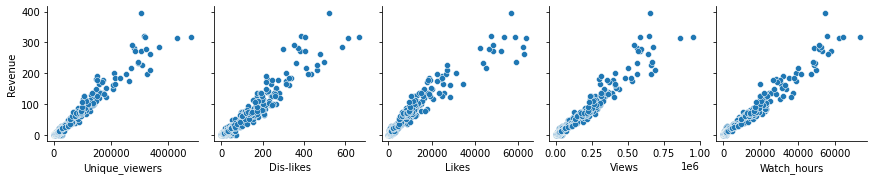

In [12]:
#선택한 컬럼과 Revenue와의 관계를 그래프로 확인
sns.pairplot(df, x_vars=['Unique_viewers','Dis­likes', 'Likes', 'Views', 'Watch_hours'], y_vars=['Revenue'])
plt.show()

In [13]:
X.describe()

,Unique_viewers,Dis­likes,Likes,Views,Watch_hours
count,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000
mean,25396.726148,39.393993,2788.837456,51973.775618,3914.129724
std,54910.406132,81.494291,7468.640081,115197.396189,9274.014141
min,8.000000,-1.000000,-1.000000,8.000000,0.115200
25%,457.500000,0.750000,15.000000,654.500000,22.515175
50%,4115.000000,6.000000,257.500000,6450.500000,297.368850
75%,18102.500000,31.000000,1246.250000,27879.500000,1617.529875
max,482254.000000,664.000000,63543.000000,954121.000000,73470.409300


In [14]:
#최솟값과 최댓값이 차이가 크므로 데이터를 예측하기 쉽게 0과 1사이의 값으로 바꿔줌
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [15]:
#훈련셋과 테스트셋 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

In [16]:
#모델 프레임 생성
#Linear Regression이므로 linear 사용
model = Sequential()
model.add(Dense(64, input_dim = 5, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error',
              optimizer='adam')

#학습 자동 중단
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [18]:
#학습
model.fit(X_train, Y_train, epochs=100, batch_size = 10, validation_split=0.2, callbacks=[early_stopping_callback])

Train on 633 samples, validate on 159 samples
Epoch 1/100
633/633 [==============================] - 0s 713us/step - loss: 2112.5288 - val_loss: 2287.5867
Epoch 2/100
633/633 [==============================] - 0s 156us/step - loss: 2028.7310 - val_loss: 2142.0070
Epoch 3/100
633/633 [==============================] - 0s 147us/step - loss: 1784.7934 - val_loss: 1785.2181
Epoch 4/100
633/633 [==============================] - 0s 147us/step - loss: 1367.2511 - val_loss: 1334.1381
Epoch 5/100
633/633 [==============================] - 0s 152us/step - loss: 948.4366 - val_loss: 926.0386
Epoch 6/100
633/633 [==============================] - 0s 141us/step - loss: 558.9612 - val_loss: 495.4361
Epoch 7/100
633/633 [==============================] - 0s 141us/step - loss: 239.1627 - val_loss: 220.4256
Epoch 8/100
633/633 [==============================] - 0s 136us/step - loss: 98.3509 - val_loss: 93.1741
Epoch 9/100
633/633 [==============================] - 0s 145us/step - loss: 74.0294 - val_l

In [28]:
Y_prediction = model.predict(X_test).flatten()
count = 0
for i in Y_test:
    label = i
    prediction = Y_prediction[count]
    print("실제 수익: {:.3f}, 예상 수익: {:.3f}".format(label,prediction))
    count = count+1
    if(count>10):
        break

test_loss = model.evaluate(X_test, Y_test, verbose=0)
print("Test Loss: {:.5f}".format(test_loss))

실제 수익: 0.000, 예상 수익: 0.753
실제 수익: 30.181, 예상 수익: 30.833
실제 수익: 0.222, 예상 수익: 0.812
실제 수익: 1.102, 예상 수익: 3.256
실제 수익: 0.097, 예상 수익: 0.793
실제 수익: 0.191, 예상 수익: 0.885
실제 수익: 0.253, 예상 수익: 0.823
실제 수익: 5.785, 예상 수익: 7.630
실제 수익: 0.146, 예상 수익: 0.919
실제 수익: 178.664, 예상 수익: 138.328
실제 수익: 65.471, 예상 수익: 59.337
Test Loss: 82.00093


Test Loss: 85.32246
